In [1]:
# Import all necessity functions for Machine Learning
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import zipfile
import cv2
import os
import random
from collections import Counter
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, silhouette_score

In [2]:
# Remove all warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# To Access the Google Drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
# To Unzip the folder
link_folder = '/content/drive/MyDrive/CNN/brain-tumor.zip'
zip_ref = zipfile.ZipFile(link_folder, 'r')
zip_ref.extractall()
zip_ref.close()

#####Extract the image data

In [5]:
DIRECTORY  = '/content/Training'
CATEGORIES = ['glioma', 'meningioma', 'notumor', 'pituitary']
STORE_DATA = []

for category in CATEGORIES:
  FOLDER_PATH = os.path.join(DIRECTORY, category)

  for IMAGE in os.listdir(FOLDER_PATH):
    IMAGE_PATH  = os.path.join(FOLDER_PATH, IMAGE)
    IMAGE_ARRAY = cv2.resize(cv2.imread(IMAGE_PATH), (80, 80))
    IMAGE_LABEL = CATEGORIES.index(category)

    STORE_DATA.append([IMAGE_ARRAY, IMAGE_LABEL])

  print("Folder {} is completed.".format(category))
  print("_"*30)

Folder glioma is completed.
______________________________
Folder meningioma is completed.
______________________________
Folder notumor is completed.
______________________________
Folder pituitary is completed.
______________________________


In [6]:
DIRECTORY  = '/content/Testing'
CATEGORIES = ['glioma', 'meningioma', 'notumor', 'pituitary']
TEST_DATA = []

for category in CATEGORIES:
  FOLDER_PATH = os.path.join(DIRECTORY, category)

  for IMAGE in os.listdir(FOLDER_PATH):
    IMAGE_PATH  = os.path.join(FOLDER_PATH, IMAGE)
    IMAGE_ARRAY = cv2.resize(cv2.imread(IMAGE_PATH), (80, 80))
    IMAGE_LABEL = CATEGORIES.index(category)

    TEST_DATA.append([IMAGE_ARRAY, IMAGE_LABEL])

  print("Folder {} is completed.".format(category))
  print("_"*30)

Folder glioma is completed.
______________________________
Folder meningioma is completed.
______________________________
Folder notumor is completed.
______________________________
Folder pituitary is completed.
______________________________


#####Shuffle the Image

In [7]:
random.shuffle(STORE_DATA)
random.shuffle(TEST_DATA)

print("Shuffle is done.")

Shuffle is done.


In [8]:
print("Length of Train data # {} ".format(len(STORE_DATA)))
print("Length of Test data  # {} ".format(len(TEST_DATA)))

Length of Train data # 5712 
Length of Test data  # 1311 


In [9]:
DATASET = []
DATASET.extend(STORE_DATA)
DATASET.extend(TEST_DATA)
random.shuffle(DATASET)

print("Length of whole dataset # {} ".format(len(DATASET)))

Length of whole dataset # 7023 


#####Split the dataset into train & test

In [10]:
X = []
y = []

for (independent, dependent) in DATASET:
  X.append(independent)
  y.append(dependent)

print("Splitting is done".capitalize())

Splitting is done


#####Convert into NumPy Array

In [11]:
X = np.array(X)
y = np.array(y)

print("Conversion into NumPy is done.".capitalize())

Conversion into numpy is done.


#####Display some of the Images

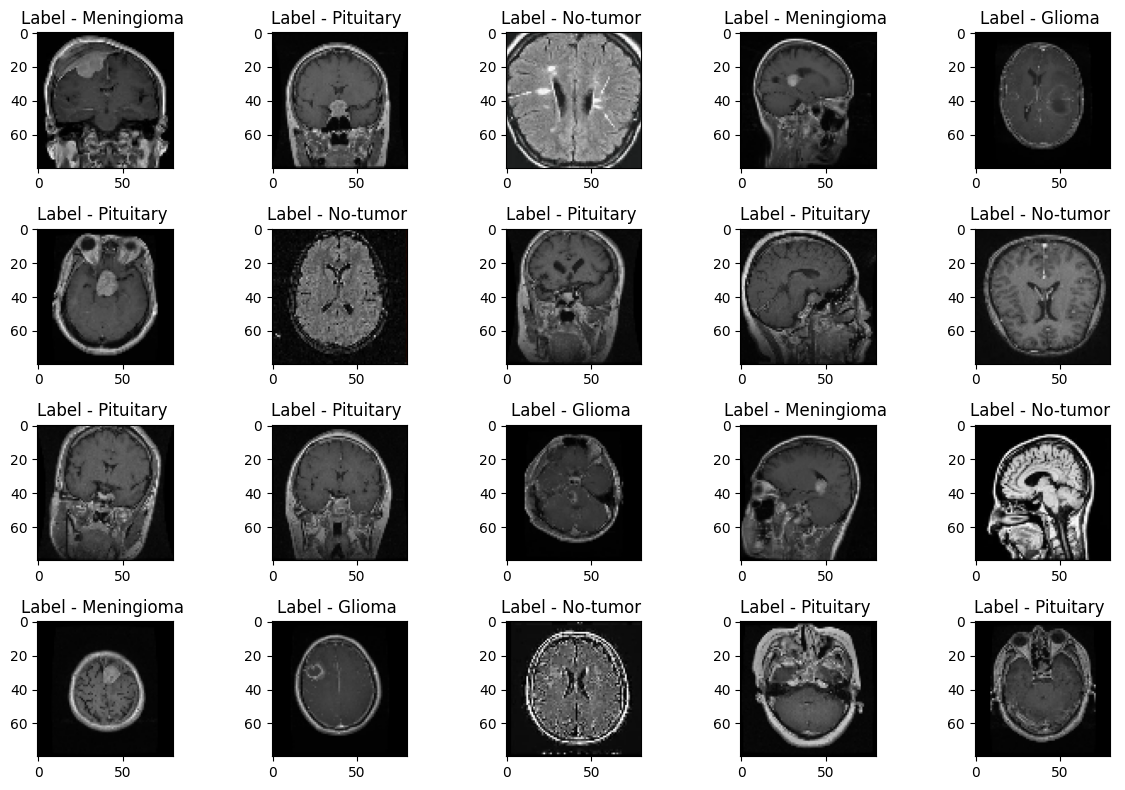

In [ ]:
lower_limit = 0
upper_limit = 20
number_row  = 4
number_col  = 5

IMAGE = X[lower_limit : upper_limit]
LABEL = y[lower_limit : upper_limit]

plt.figure(figsize = (12, 8))
for index, image in enumerate(IMAGE):
  plt.subplot(number_row, number_col, index + 1)
  plt.imshow(image)
  plt.title("Label - {} ".format('Glioma' if LABEL[index] == 0\
                                 else 'Meningioma' if LABEL[index] == 1\
                                 else 'No-tumor' if LABEL[index] == 2\
                                 else 'Pituitary'))

plt.tight_layout()
plt.show()

#####Do the Normalization

In [12]:
X = X/255

print("Normalization is done.".capitalize())

Normalization is done.


#####Check the distribution of target class

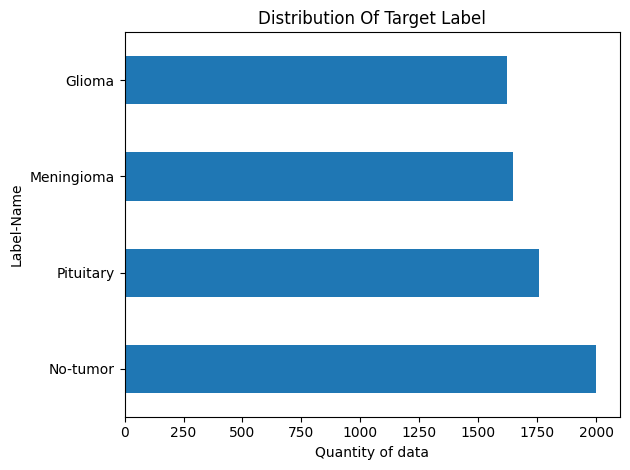

In [ ]:
pd.DataFrame(y, columns = ['Target']).applymap(lambda x: 'Glioma' if x == 0\
                                               else 'Meningioma' if x == 1\
                                               else 'No-tumor' if x == 2\
                                               else 'Pituitary')['Target'].\
                                               value_counts().plot(kind = 'barh')

plt.title('Distribution of Target label'.title())
plt.xlabel('Quantity of data')
plt.ylabel('Label-Name')
plt.tight_layout()
plt.show()

#####Split the data train and test

In [13]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from torchvision import models

In [14]:
# Change the shape of the X
CHANNEL = 3
HEIGHT  = 80
WIDTH   = 80

X = X.reshape(X.shape[0], CHANNEL, HEIGHT, WIDTH)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,\
                                                    y,\
                                                    test_size = 0.25,\
                                                    random_state = 42)

# Convert the train and test into Float with respect to torch
X_train = torch.tensor(data = X_train,\
                       dtype = torch.float32)

y_train = torch.tensor(data = y_train,\
                       dtype = torch.float32)

X_test  = torch.tensor(data = X_test,\
                       dtype = torch.float32)

y_test  = torch.tensor(data = y_test,\
                       dtype = torch.float32)

print("X_train shape # {} ".format(X_train.shape), '\n')
print("y_train shape # {} ".format(y_train.shape), '\n')
print("X_test shape  # {} ".format(X_test.shape), '\n')
print("y_test shape  # {} ".format(y_test.shape), '\n')

print("_"*60, '\n')

# Call the DataLoader with batch_size = 64
BATCH_SIZE = 64

TRAIN_LOADER = DataLoader(dataset = list(zip(X_train, y_train)),\
                          batch_size = BATCH_SIZE,\
                          shuffle = True)

TEST_LOADER  = DataLoader(dataset = list(zip(X_test, y_test)),\
                          batch_size = BATCH_SIZE,\
                          shuffle = True)

print("Batch size of Train # {} ".format(TRAIN_LOADER.batch_size), '\n')
print("Batch size of Test  # {} ".format(TEST_LOADER.batch_size), '\n')

print("_"*60, '\n')

# Extract the data and label
train_data, train_label = next(iter(TRAIN_LOADER))
test_data, test_label   = next(iter(TEST_LOADER))

print("Train data with single batch_size  # {} ".format(train_data.shape), '\n')
print("Train label with single batch_size # {} ".format(train_label.shape), '\n')
print("Test data with single batch_size  # {} ".format(test_data.shape), '\n')
print("Test label with single batch_size # {} ".format(test_label.shape))

X_train shape # torch.Size([5267, 3, 80, 80])  

y_train shape # torch.Size([5267])  

X_test shape  # torch.Size([1756, 3, 80, 80])  

y_test shape  # torch.Size([1756])  

____________________________________________________________ 

Batch size of Train # 64  

Batch size of Test  # 64  

____________________________________________________________ 

Train data with single batch_size  # torch.Size([64, 3, 80, 80])  

Train label with single batch_size # torch.Size([64])  

Test data with single batch_size  # torch.Size([64, 3, 80, 80])  

Test label with single batch_size # torch.Size([64]) 


#####Initialize the GPU

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


#####Model Building

In [ ]:
"""
    1. Create a class named BrainTumorClassification with TWO parameters
      1.1 input_channel: Define whether the image is RGB or GRAY
      1.2 output_dimension: Define the target class. == 1 menas binary class and > 1 means multi-class classification
    2. Call the super function that will inherit the parent class of torch
"""
class BrainTumorClassification(nn.Module):
  def __init__(self, input_channel = None, output_dimension = None):
    super().__init__()

    """
        Create the Left most, Right most, Convolutional Layer that will take
          1. in_channels : Define the input_channels - in this case, 3(means RGB Image)
          2. out_channels : Define the output channels after being done the convolution operation
          3. kernel_size : Define the kernel/filter that will be placed on top of images so that we can extract the Feature Map
          4. stride : Define how much this kernel would be moved (TOP->BOTTOM->LEFT->RIGHT)
          5. padding : Define whether the Feature Map would be equivalent to orginal Image shape or not. == 1 means orginal & 0 == means might be changed.

        Define the Activation Layer so that we can pass the information to the subsequent layers/neurons. In this case, ReLU activation - prevent the vanishing gradient

        MaxPooling : Do the down-sampling on top of Feature Map so that we can prevent Translation invariance and overfitting problem
          1. kernel_size: In this case, (2, 2) - initially it would be filled with random numbers but it is trainable parameters
          2. stride : In this case, (2, 2) - The Feature map that we would be obtained would be half of the orginal Image

        Dropout : Dropout Layer is generally used to prevent the overfitting problem. In this case, 0.4 for all Convolutional Layer

        # Conv1 Convolutional Layer
            Image Shape : 80 * 80 * 3 -> 40 * 40 * 64 - > 20 * 20 * 32
        # Conv2 Convolutional Layer
            Image Shape : 80 * 80 * 3 -> 40 * 40 * 64 - > 20 * 20 * 16
    """
    # These are used for the separate two convolutional layer
    self.CONV_BLOCK1 = self.conv_block1(input_channel = input_channel, output_channel = 64, dropout = 0.2)
    self.CONV_BLOCK2 = self.conv_block2(input_channel, output_channel = 64, dropout = 0.3)

    # Pass the Feature map into two different layers
    self.LEFT_FC  = self.left_fc_block(input_features  = 20 * 20 * 16 + 20 * 20 * 32, output_features = 128, dropout = 0.2)
    self.RIGHT_FC = self.right_fc_block(input_features = 20 * 20 * 32 + 20 * 20 * 16, output_features = 64,  dropout = 0.2)

    # Pass the final data into the FC layer for providing the output
    self.OUTPUT  = self.output_layer(input_features = 192, output_featutes = 4)

  def conv_block1(self, input_channel = None, output_channel = None, dropout = None):
    return nn.Sequential(
        nn.Conv2d(in_channels  = input_channel,\
                  out_channels = output_channel,\
                  kernel_size  = (3, 3),\
                  stride       = (1, 1),\
                  padding      = 1),

        nn.ReLU(inplace = True),

        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride      = (2, 2)),

        nn.Conv2d(in_channels  = output_channel,\
                  out_channels = 16,\
                  kernel_size  = (3, 3),\
                  stride       = (1, 1),\
                  padding      = 1),

        nn.ReLU(inplace = True),

        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride      = (2, 2)),

        nn.Dropout(p = dropout)
    )
  def conv_block2(self, input_channel = None, output_channel = None, dropout = None):
    return nn.Sequential(
        nn.Conv2d(in_channels  = input_channel,\
                  out_channels = output_channel,\
                  kernel_size  = (3, 3),\
                  stride       = (1, 1),\
                  padding      = 1),

        nn.ReLU(inplace = True),

        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride      = (2, 2)),

         nn.Conv2d(in_channels = output_channel,\
                  out_channels = 32,\
                  kernel_size  = (3, 3),\
                  stride       = (1, 1),\
                  padding      = 1),

        nn.ReLU(inplace = True),

        nn.MaxPool2d(kernel_size = (2, 2),\
                     stride      = (2, 2)),

        nn.Dropout(p = dropout)
   )
  def left_fc_block(self, input_features = None, output_features = None, dropout = None):
    """
        Create the Sequentila Fully Connected Layer for LEFT, MIDDLE, RIGHT
          1. in_features : There, we will fill the Feature Map shape after being completed each Convolutional Operation
          2. out_features : There, Define how many neurons that we want

        BatchNormalization is used to make their distribution into the same shape so that gradient would be stable to reach the Global minima
    """
    return nn.Sequential(
        nn.Linear(in_features = input_features,\
                  out_features = output_features),

        nn.ReLU(inplace = True),

        nn.BatchNorm1d(output_features),

        nn.Dropout(p = dropout)
    )
  def right_fc_block(self, input_features = None, output_features = None, dropout = None):
    """
        Create the Sequentila Fully Connected Layer for LEFT, MIDDLE, RIGHT
          1. in_features : There, we will fill the Feature Map shape after being completed each Convolutional Operation
          2. out_features : There, Define how many neurons that we want

        BatchNormalization is used to make their distribution into the same shape so that gradient would be stable to reach the Global minima
    """
    return nn.Sequential(
        nn.Linear(in_features = input_features,\
                  out_features = output_features),
        nn.ReLU(inplace = True),
        nn.BatchNorm1d(output_features),
        nn.Dropout(p = dropout)
    )

  def output_layer(self, input_features = None, output_featutes = None):
    """
        Create the Sequentila Fully Connected Layer
          1. in_features : There, we will fill the Feature Map shape after being completed each Convolutional Operation
          2. out_features : There, Define how many neurons that we want

        BatchNormalization is used to make their distribution into the same shape so that gradient would be stable to reach the Global minima
    """
    return nn.Sequential(
          nn.Linear(in_features = input_features,\
                    out_features = 128),\
          nn.ReLU(inplace = True),
          nn.Dropout(p = 0.5),


          nn.Linear(in_features = 128, out_features = 64),
          nn.ReLU(inplace = True),
          nn.Linear(in_features = 64, out_features = 4),
          nn.Softmax()
      )
  def forward(self, x):
    """
        1. Pass the Independent Features to all LEFT, MIDDLE, RIGHT
        2. Definately, change their shape so that we can pass the result to the Fully Connected layer
        3. Return the output

        First, pass the data - x - into the two separate convolutional layer
        Second, Do the Flatten operation so that we can pass the data to FC layer
        Third, Do the concat operation with dim = 1: meaning that it would be appended with respect to column-wise
        Fourth, Pass the Feature map to separate layers (128, 64) and do the concat atlast
        Finally, the data passed to the FC layer to give the output
    """
    # Pass the data into two separate convolutonal layer
    conv1 = self.CONV_BLOCK1(x)
    conv2 = self.CONV_BLOCK2(x)

    # Do the Flattening
    conv1 = conv1.reshape(conv1.shape[0], -1)
    conv2 = conv2.reshape(conv2.shape[0], -1)

    # Do the concat
    conv_concat = torch.concat((conv1, conv2), dim = 1)

    # Passing the data into left and right FC
    fc1 = self.LEFT_FC(conv_concat)
    fc2 = self.RIGHT_FC(conv_concat)

    # Do the concat again so that we can pass this data
    merged = torch.cat((fc1, fc2), dim = 1)

    # Ended up the data should be passed into the FC layer that will give the output
    out = self.OUTPUT(merged)
    if out is not None:
      return out
    else:
      return "ERROR"

In [ ]:
try:
  model = BrainTumorClassification(input_channel = 3, output_dimension = 4)
except Exception as e:
  print(e.with_traceback())
else:
  print(model.parameters)

<bound method Module.parameters of BrainTumorClassification(
  (CONV_BLOCK1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.2, inplace=False)
  )
  (CONV_BLOCK2): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.3, inplace=False)
  )
  (LEFT_F

In [ ]:
# Connect the model into GPU
model = model.to(device)

In [ ]:
# Find the total trainable parameters
TOTAL_PARAMETERS = 0
for name, params in model.named_parameters():
  if params.requires_grad:
    print("Layer - {} & trainable parameters # {} ".upper().format(name, params.numel()))
    print("_"*60)
    TOTAL_PARAMETERS+= params.numel()
  else:
    pass

print("\ntotal number of trainable parameters # {} ".upper().format(TOTAL_PARAMETERS))

LAYER - CONV_BLOCK1.0.weight & TRAINABLE PARAMETERS # 1728 
____________________________________________________________
LAYER - CONV_BLOCK1.0.bias & TRAINABLE PARAMETERS # 64 
____________________________________________________________
LAYER - CONV_BLOCK1.3.weight & TRAINABLE PARAMETERS # 9216 
____________________________________________________________
LAYER - CONV_BLOCK1.3.bias & TRAINABLE PARAMETERS # 16 
____________________________________________________________
LAYER - CONV_BLOCK2.0.weight & TRAINABLE PARAMETERS # 1728 
____________________________________________________________
LAYER - CONV_BLOCK2.0.bias & TRAINABLE PARAMETERS # 64 
____________________________________________________________
LAYER - CONV_BLOCK2.3.weight & TRAINABLE PARAMETERS # 18432 
____________________________________________________________
LAYER - CONV_BLOCK2.3.bias & TRAINABLE PARAMETERS # 32 
____________________________________________________________
LAYER - LEFT_FC.0.weight & TRAINABLE PARAMETERS

In [ ]:
# Display the summary
summary(model = model, input_size = X_train.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 80, 80]           1,792
              ReLU-2           [-1, 64, 80, 80]               0
         MaxPool2d-3           [-1, 64, 40, 40]               0
            Conv2d-4           [-1, 16, 40, 40]           9,232
              ReLU-5           [-1, 16, 40, 40]               0
         MaxPool2d-6           [-1, 16, 20, 20]               0
           Dropout-7           [-1, 16, 20, 20]               0
            Conv2d-8           [-1, 64, 80, 80]           1,792
              ReLU-9           [-1, 64, 80, 80]               0
        MaxPool2d-10           [-1, 64, 40, 40]               0
           Conv2d-11           [-1, 32, 40, 40]          18,464
             ReLU-12           [-1, 32, 40, 40]               0
        MaxPool2d-13           [-1, 32, 20, 20]               0
          Dropout-14           [-1, 32,

#####Display the model architecture

In [ ]:
! pip install torchviz

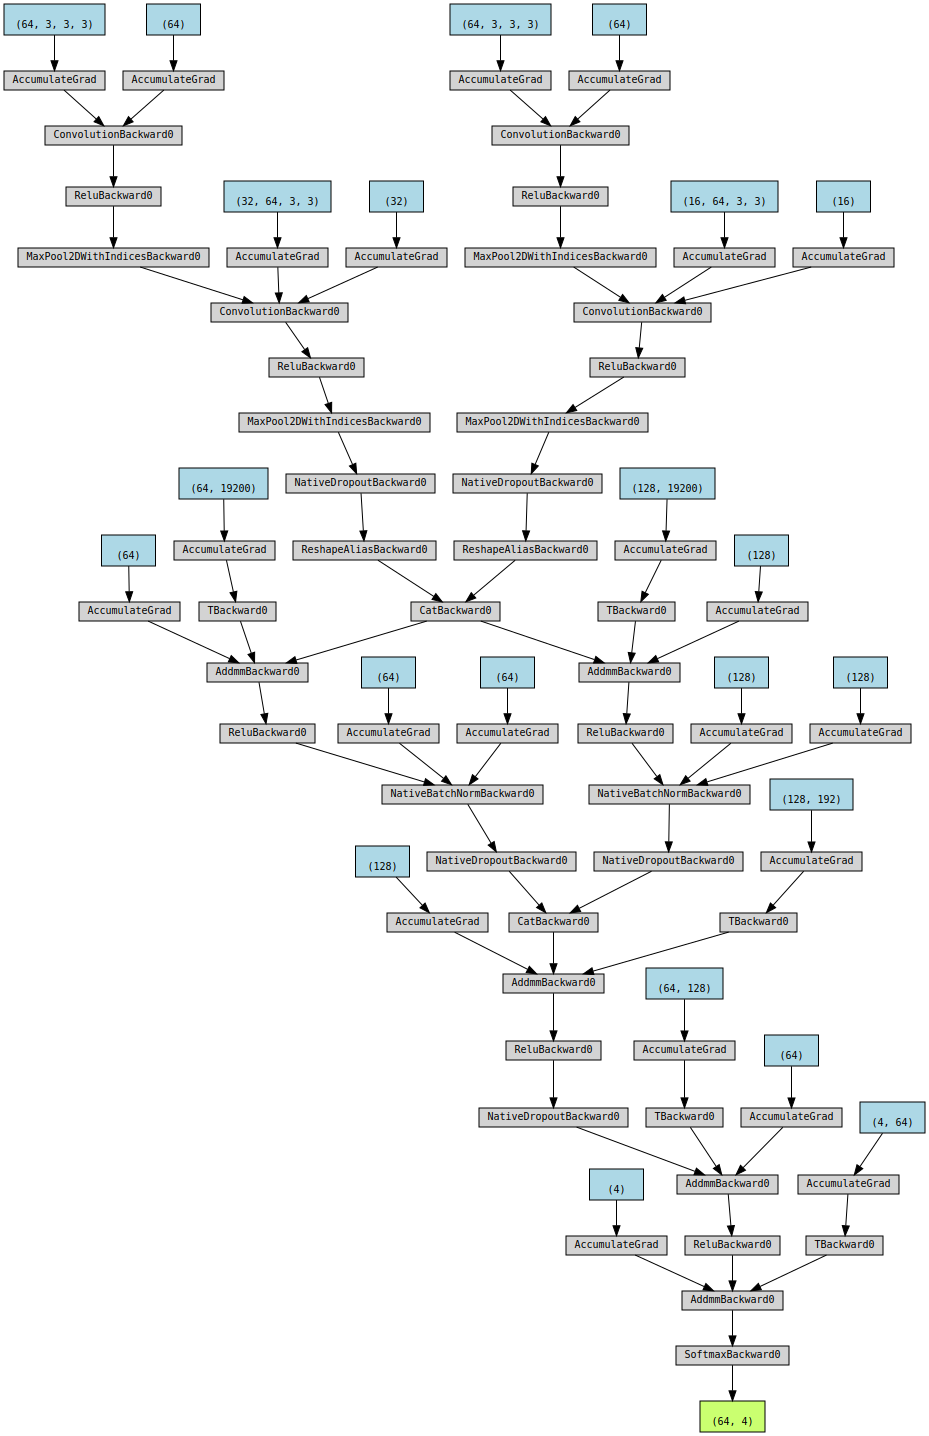

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Import the library
plt.figure(figsize = (10, 8))
from torchviz import make_dot

make_dot(model(X_train[0:64].to(device)),\
         show_attrs = False)

#####Define the loss & optimizer

In [ ]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params = model.parameters(), lr = LEARNING_RATE)

#####Define the model check-point

In [ ]:
"""
    The checkpoint may be used directly or as the starting point for a new run, picking up where it left off.
    When training deep learning models, the checkpoint captures the weights of the model.
    These weights can be used to make predictions as-is or as the basis for ongoing training.
"""
def checkpoint(model = None, filename = None):
  if model is not None:
    return torch.save(model.state_dict(), filename)
  else:
    print("Model should be passed. !".capitalize())

def resume(model = None, filename = None):
  if filename is not None:
    return model.load_state_dict(torch.load(filename))
  else:
    print("Write the filename correctly.".capitalize())

#####Do training....

In [ ]:
"""
    Create a class named Fit and default constructor
      1. EPOCHS: Define how many times the code would be executed
      2. TRAIN_LOSS: Define the train loss during the training
      3. VAL_LOSS: Define the validation or test loss during training and testing with respect to model
      4. TRAIN_ACC: Define the train accuracy that is computed during training
      5. VAL_ACC: Define the validation accuracy that is computed during training and testing
      6. BATCH_SIZE: Define the batch_size that is passed at a time to train the model and update the weights and bias

    Create a method named fit that will take a couple of parameters
      1. model: Define the model
      2. epochs: Define the epoch size that would be provided by users
      3. batch_size : Define the batch_size which is used to train the model and assist to upadte the weights and bias
      4. x: X_train - training dataset
      5. y: y_train - trainung dataset
      6. val_data: X_test - testing data
      7. val_label: y_test - testing data as a label
      8. verbose: 1 means display each iteration and epoch loss and accuracy
"""
class Fit:
  def __init__(self):
    self.EPOCHS     = -1
    self.TRAIN_LOSS = []
    self.VAL_LOSS   = []
    self.TRAIN_ACC  = []
    self.VAL_LOSS   = []
    self.BATCH_SIZE = 32
    self.history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}

  ############################
  #      Regularization      #
  ############################
  """
      Define the L1 regularization that would prevent the overfitting problem
      Formula of L1 regularization : loss + l1_lamba * |weight|
  """
  def l1(self, model = None, l1_lambda = 0.01):
    return sum(torch.norm(parameter, 1) for parameter in model.parameters())

  """
      Define the L2 regularization that would prevent the overfitting problem
      Formula of L2 regularization : loss + l2_lamba * weight * weight
  """
  def l2(self, model = None, l2_lambda = 0.01):
    return sum(torch.norm(parameter, 2) for parameter in model.parameters())

  ###########################
  #           Fit           #
  ###########################

  def fit(self, model = None, X = None, y = None, epochs = None, batch_size = None, val_data = None, val_label = None, verbose = 1):
    """
        Store the Epoch and batch_size in the varibales
        Convert the train and test dataset into Float that is accepted for PyTorch
        Create the DataLoader with respect to train and test
    """
    self.EPOCHS = epochs
    self.BATCH_SIZE = batch_size

    X = torch.tensor(data = X, dtype = torch.float32)
    y = torch.tensor(data = y, dtype = torch.float32)

    val_data  = torch.tensor(data = val_data, dtype = torch.float32)
    val_label = torch.tensor(data = val_label, dtype = torch.float32)

    train_loader = DataLoader(dataset = list(zip(X, y)), batch_size = self.BATCH_SIZE, shuffle = True)
    test_loader  = DataLoader(dataset = list(zip(val_data, val_label)), batch_size = self.BATCH_SIZE, shuffle = True)

    ###########################
    #        Training         #
    ###########################

    model.train()

    """
        1. Run a loop with respect to EPOCH

        2. Initialize a couple of variables that would be necessary
          2.1 total_train_loss : Define the total train loss during training
          2.2 total_val_loss : Define the total validation loss during testing
          2.3 train_predictions : Define the train_predictions after completed each EPOCH
          2.4 val_predictions : Define the validation predictions after completed each EPOCH
          2.5 train_labels : Define the total train labels in each EPOCH
          2.6 val_labels : Define the total validation labels in each EPOCH

       3. Run a loop with respect to train_loader and extract the data and labels

       4. Pass the data into the defined model and do the predictions

       5. Calculate the loss function
    """
    for epoch in range(self.EPOCHS):
      total_train_loss  = []
      total_val_loss    = []
      train_predictions = []
      val_predictions   = []
      train_labels      = []
      val_labels        = []

      for (X_batch, y_batch) in train_loader:
        """
            1. Connect the X_batch and y_batch into GPU so that we can make the training faster
            2. Initialize the optimizer
            3. Do back propagation with respect to train_loss
            4. Do step operation with respect to optimizer
        """
        X_batch = X_batch.to(device)
        y_batch = y_batch.long()
        y_batch = y_batch.to(device)

        # Do the prediction
        train_prediction = model(X_batch)
        # Compute the loss function
        train_loss = loss_function(train_prediction, y_batch)

        # Initialize the optimizer
        optimizer.zero_grad()
        # Do back-propagation with respect to train_loss
        train_loss.backward()
        # Do the step operation with respect to optimier
        optimizer.step()

        # Store the train predictions into the train_predictions list
        train_predictions.extend(torch.argmax(train_prediction.cpu(), 1).flatten().detach().numpy())
        # Store the train labels orginal into train_labels
        train_labels.extend(y_batch.cpu().flatten().detach().numpy())
        # Store the train loss into total_train_loss
        total_train_loss.append(train_loss.item())

      ###########################
      #    Evaluation Train     #
      ###########################
      train_accuracy = accuracy_score(train_labels, train_predictions)

      # Store the accuracy and loss into the history
      self.history['accuracy'].append(train_accuracy)
      self.history['loss'].append(np.array(total_train_loss).mean())

      ############################
      #         Testing          #
      ############################

      model.eval()

      for (val_data, val_label) in test_loader:
        val_label = val_label.long()
        val_label = val_label.to(device)
        val_data  = val_data.to(device)

        # Compute the validation prediction
        val_prediction = model(val_data)
        # Compute the validation loss
        val_loss = loss_function(val_prediction, val_label)

        # Store the validation predictions into val_predictions
        val_predictions.extend(torch.argmax(val_prediction.cpu(), 1).flatten().detach().numpy())
        # Store the validation labels into val_labels
        val_labels.extend(val_label.cpu().flatten().detach().numpy())
        # Store the validation loss into total_val_loss
        total_val_loss.append(val_loss.item())

      ############################
      #      Compute Testing     #
      ############################

      val_accuracy = accuracy_score(val_labels, val_predictions)

      # Store the val_accuracy and val_loss into the history
      self.history['val_accuracy'].append(val_accuracy)
      self.history['val_loss'].append(np.array(total_val_loss).mean())

      print("Epoch {}/{} ".format(epoch + 1, self.EPOCHS))

      print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(train_loader.batch_size,\
                                                                                                                test_loader.batch_size,\
                                                                                                                np.array(total_train_loss).mean(),\
                                                                                                                train_accuracy,\
                                                                                                                np.array(total_val_loss).mean(),\
                                                                                                                val_accuracy))

In [ ]:
# Call the model with this current directory
try:
  model_fit = Fit()

except Exception as e:
  print(e.with_traceback())
else:
  model_fit.fit(model = model,\
                X = X_train,\
                y = y_train,\
                epochs = 50,\
                batch_size = 64,\
                val_data = X_test,\
                val_label = y_test,\
                verbose = 1)

Epoch 1/50 
64/64 [=========================] loss: 1.124798042228423 - accuracy: 0.6343269413328271 - val_loss: 1.1248435165200914 - val_accuracy: 0.5939635535307517
Epoch 2/50 
64/64 [=========================] loss: 1.051237117095166 - accuracy: 0.6865388266565408 - val_loss: 0.9674096362931388 - val_accuracy: 0.7727790432801822
Epoch 3/50 
64/64 [=========================] loss: 0.9820630457027849 - accuracy: 0.7565976836909056 - val_loss: 0.9438941436154502 - val_accuracy: 0.7955580865603644
Epoch 4/50 
64/64 [=========================] loss: 0.9560440498662283 - accuracy: 0.7835580026580596 - val_loss: 0.958217978477478 - val_accuracy: 0.784738041002278
Epoch 5/50 
64/64 [=========================] loss: 0.9699418336512095 - accuracy: 0.7708372887791912 - val_loss: 0.9289163776806423 - val_accuracy: 0.8120728929384966
Epoch 6/50 
64/64 [=========================] loss: 0.9084716302802763 - accuracy: 0.8342509967723561 - val_loss: 0.9066169943128314 - val_accuracy: 0.8354214123006

#####Display the loss & accuracy

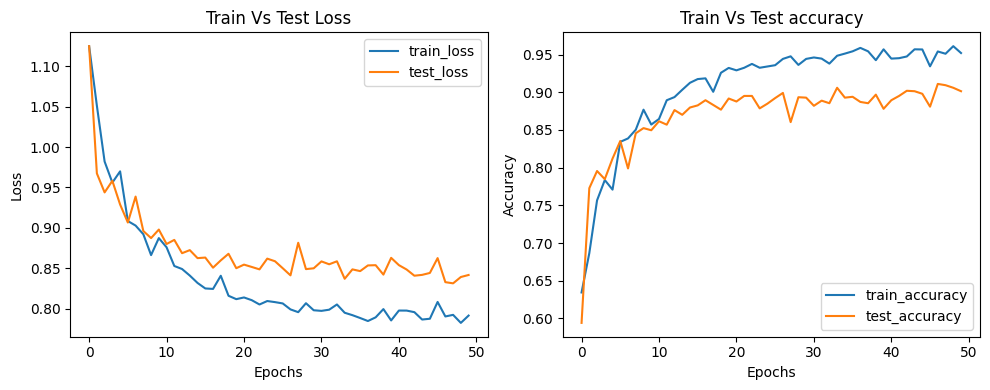

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
axes[0].plot(model_fit.history['loss'], label = 'train_loss')
axes[0].plot(model_fit.history['val_loss'], label = 'test_loss')
axes[0].set_title('Train Vs Test Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(model_fit.history['accuracy'], label = 'train_accuracy')
axes[1].plot(model_fit.history['val_accuracy'], label = 'test_accuracy')
axes[1].set_title('Train Vs Test accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

#####Evaluation of training

In [ ]:
##########################
#       Training         #
##########################
train_labels   = []
train_predicts = []

for train_data, train_label in TRAIN_LOADER:
  """
      Conncet the GPU
  """
  train_data  = train_data.to(device)
  train_label = train_label.long()
  train_label = train_label.to(device)

  predicted = model(train_data)

  train_predicts.extend(torch.argmax(predicted.cpu(), 1).flatten().detach().numpy())
  train_labels.extend(train_label.cpu().flatten().detach().numpy())

print("accuracy  # {} ".upper().format(accuracy_score(train_labels, train_predicts)),'\n')
print("precision # {} ".upper().format(precision_score(train_labels, train_predicts, average = 'macro')),'\n')
print("recall    # {} ".upper().format(recall_score(train_labels, train_predicts, average = 'macro')),'\n')
print("f1_score  # {} ".upper().format(f1_score(train_labels, train_predicts, average = 'macro')))

ACCURACY  # 0.9620277197645719  

PRECISION # 0.9612055091915258  

RECALL    # 0.9615726937241064  

F1_SCORE  # 0.9613470889664815 


In [ ]:
##########################
#        Testing         #
##########################

test_labels   = []
test_predicts = []

for test_data, test_label in TEST_LOADER:
  """
      Conncet the GPU
  """
  test_data  = train_data.to(device)
  test_label = train_label.long()
  test_label = train_label.to(device)

  predicted = model(test_data)

  test_predicts.extend(torch.argmax(predicted.cpu(), 1).flatten().detach().numpy())
  test_labels.extend(test_label.cpu().flatten().detach().numpy())

print("accuracy  # {} ".upper().format(accuracy_score(test_labels, test_predicts)),'\n')
print("precision # {} ".upper().format(precision_score(test_labels, test_predicts, average = 'macro')),'\n')
print("recall    # {} ".upper().format(recall_score(test_labels, test_predicts, average = 'macro')),'\n')
print("f1_score  # {} ".upper().format(f1_score(test_labels, test_predicts, average = 'macro')))

ACCURACY  # 1.0  

PRECISION # 1.0  

RECALL    # 1.0  

F1_SCORE  # 1.0 


#####Display the classification report & confusion matrix

In [ ]:
# For Training Purpose
print(classification_report(train_labels, train_predicts))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1238
           1       0.94      0.92      0.93      1253
           2       0.97      0.97      0.97      1525
           3       0.98      0.98      0.98      1251

    accuracy                           0.96      5267
   macro avg       0.96      0.96      0.96      5267
weighted avg       0.96      0.96      0.96      5267



In [ ]:
# For Testing Purpose
print(classification_report(test_labels, test_predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       140
           3       1.00      1.00      1.00       168

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532



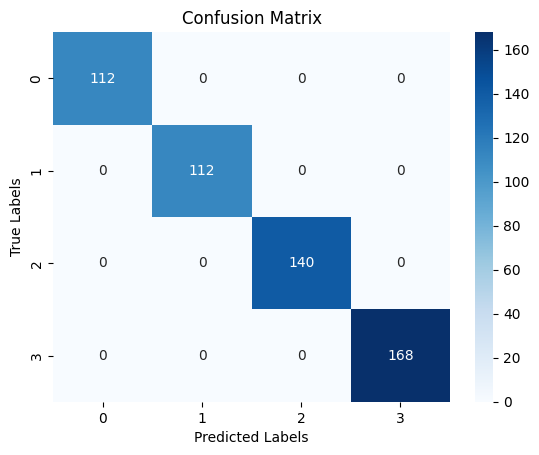

In [ ]:
sns.heatmap(confusion_matrix(test_labels, test_predicts),\
            annot = True,\
            fmt='d',\
            cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

####Display some of the images that is predicted

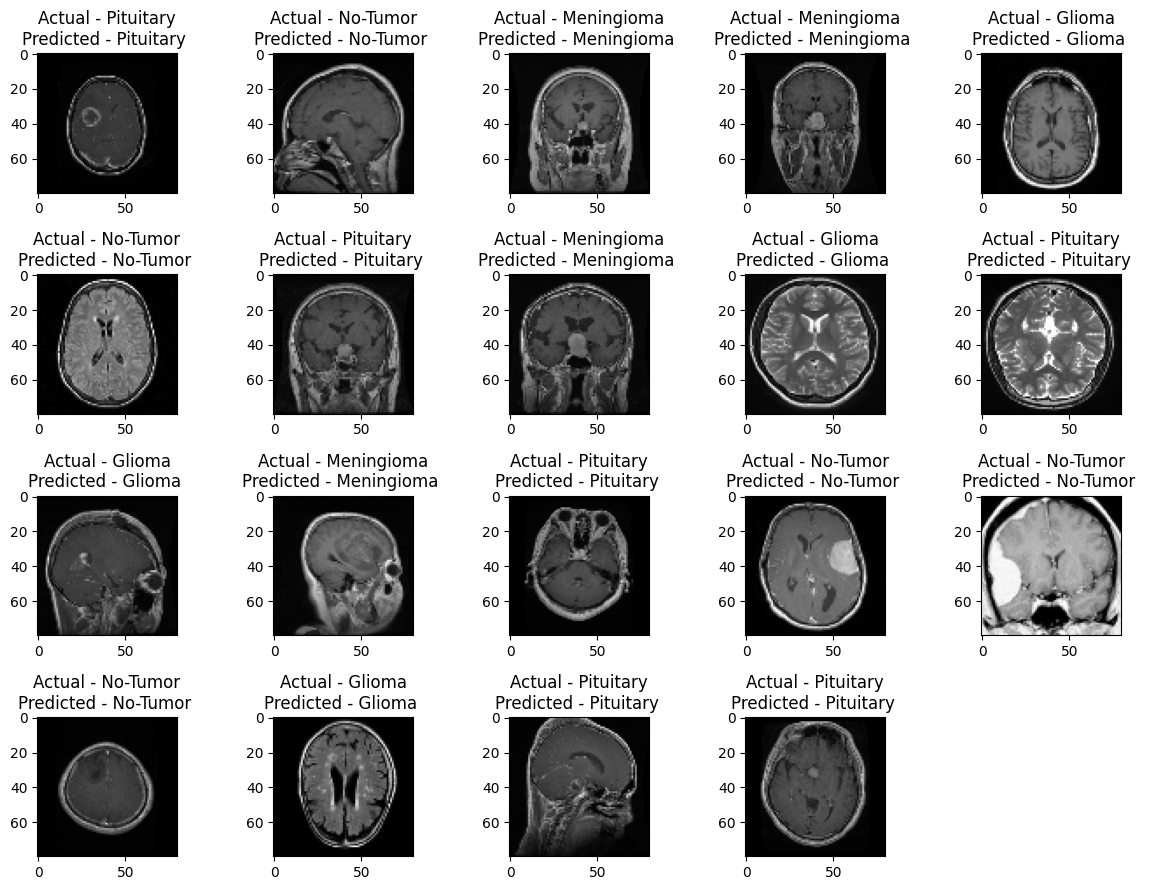

In [ ]:
test_labels   = []
test_predicts = []

for test_data, test_label in TEST_LOADER:
  """
      Conncet the GPU
  """
  test_data  = train_data.to(device)
  test_label = train_label.long()
  test_label = train_label.to(device)

  predicted = model(test_data)

  test_predicts.extend(torch.argmax(predicted.cpu(), 1).flatten().detach().numpy())
  test_labels.extend(test_label.cpu().flatten().detach().numpy())

  break

"""
    Display the Image with respect to Actual and Predict
"""
MIN     = 0
MAX     = 20
labels  = test_labels[MIN : MAX]
predict = test_predicts[MIN : MAX]

IMAGE, LABEL = next(iter(TEST_LOADER))
IMAGE = IMAGE.reshape(IMAGE.shape[0], 80, 80, 3)[MIN : MAX - 1]

plt.figure(figsize = (12, 9))
plt.title('Evaluation Actual and Predict.\n')
for index, image in enumerate(IMAGE):
  plt.subplot(4, 5, index + 1)
  plt.title('Actual - {}\nPredicted - {} '.format('Glioma' if labels[index] == 0\
                                                  else 'Meningioma' if labels[index] == 1\
                                                  else 'No-Tumor' if labels[index] == 2\
                                                  else 'Pituitary',

                                                  'Glioma' if predict[index] == 0\
                                                  else 'Meningioma' if predict[index] == 1\
                                                  else 'No-Tumor' if predict[index] == 2\
                                                  else 'Pituitary'))

  plt.imshow(image)

plt.tight_layout()
plt.show()

##### Do the Kfold - 3

In [ ]:
Kfold = KFold(n_splits = 3,\
      shuffle = True,\
      random_state = 42)

count     = 1
ACCURACY  = []
PRECISION = []
RECALL    = []
F1_SCORE  = []
HISTORY   = []

model.train()

for train_index, test_index in Kfold.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  try:
    model_fit = Fit()
  except Exception as e:
    print(e.with_traceback())
  else:
    print("CV # {} ".format(count),'\n\n')
    history = model_fit.fit(model = model,\
                  X = X_train,\
                  y = y_train,\
                  epochs = 50,\
                  batch_size = 64,\
                  val_data = X_test,\
                  val_label = y_test,\
                  verbose = 1)

    HISTORY.append(history)

    ##########################
    #        Testing         #
    ##########################

    test_labels   = []
    test_predicts = []

    for test_data, test_label in TEST_LOADER:
      """
          Conncet the GPU
      """
      test_data  = train_data.to(device)
      test_label = train_label.long()
      test_label = train_label.to(device)

      predicted = model(test_data)

      test_predicts.extend(torch.argmax(predicted.cpu(), 1).flatten().detach().numpy())
      test_labels.extend(test_label.cpu().flatten().detach().numpy())

    print("accuracy  # {} ".upper().format(accuracy_score(test_labels, test_predicts)),'\n')
    print("precision # {} ".upper().format(precision_score(test_labels, test_predicts, average = 'macro')),'\n')
    print("recall    # {} ".upper().format(recall_score(test_labels, test_predicts, average = 'macro')),'\n')
    print("f1_score  # {} ".upper().format(f1_score(test_labels, test_predicts, average = 'macro')))

    """
        Append the Evaluation into the Defined List
    """
    ACCURACY.append(accuracy_score(test_labels, test_predicts))
    PRECISION.append(precision_score(test_labels, test_predicts, average = 'macro'))
    RECALL.append(recall_score(test_labels, test_predicts, average = 'macro'))
    F1_SCORE.append(f1_score(test_labels, test_predicts, average = 'macro'))

    count = count + 1

CV # 1  


Epoch 1/50 
64/64 [=========================] loss: 0.8042006669817744 - accuracy: 0.9434002563007262 - val_loss: 0.8113555151063043 - val_accuracy: 0.9312259718069201
Epoch 2/50 
64/64 [=========================] loss: 0.77660207168476 - accuracy: 0.9668944895343871 - val_loss: 0.8111082154351312 - val_accuracy: 0.9333618111917984
Epoch 3/50 
64/64 [=========================] loss: 0.7735019028186798 - accuracy: 0.9703118325501923 - val_loss: 0.8090449410515863 - val_accuracy: 0.9363519863306279
Epoch 4/50 
64/64 [=========================] loss: 0.7700414633428728 - accuracy: 0.9733020076890218 - val_loss: 0.8156543615702037 - val_accuracy: 0.9256727894062367
Epoch 5/50 
64/64 [=========================] loss: 0.768427820624532 - accuracy: 0.9750106791969244 - val_loss: 0.8090178289928952 - val_accuracy: 0.9363519863306279
Epoch 6/50 
64/64 [=========================] loss: 0.7683721458589708 - accuracy: 0.9750106791969244 - val_loss: 0.8151302353755848 - val_accuracy: 0.9

In [ ]:
print("ACCURACY  # {} ".format(np.array(ACCURACY).mean()),'\n')
print("PRECISION # {} ".format(np.array(PRECISION).mean()),'\n')
print("RECALL    # {} ".format(np.array(RECALL).mean()),'\n')
print("F1_SCORE  # {} ".format(np.array(F1_SCORE).mean()))

ACCURACY  # 0.9824561403508771  

PRECISION # 0.9833333333333334  

RECALL    # 0.9791666666666666  

F1_SCORE  # 0.978835978835979 


###Transfer Learning Techniques

In [49]:
# VGG16
VGG16 = models.vgg16(pretrained = True)

VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [50]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [51]:
# Make sure their weights and bias would be freezed
for params in VGG16.parameters():
  if params.requires_grad == True:
    params.requires_grad = False
  else:
    pass

TRAINABLE_PARAMETERS = 0

for _ , params in VGG16.named_parameters():
  if params.requires_grad == True:
    TRAINABLE_PARAMETERS+= params.numel()
  else:
    pass

if TRAINABLE_PARAMETERS == 0:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS))
else:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS))

Number of total trainable parameters # 0 


In [52]:
DROPOUT_RATE = 0.6
VGG16.classifier = nn.Sequential(
    nn.Linear(in_features = 25088, out_features = 128),
    nn.ReLU(inplace = True),

    nn.Linear(in_features = 128, out_features = 64),
    nn.ReLU(inplace = True),
    nn.Dropout(p = DROPOUT_RATE),

    nn.Linear(in_features = 64, out_features = 4),
    nn.Softmax()
)

print(VGG16.parameters)

<bound method Module.parameters of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size

In [53]:
TRAINABLE_PARAMETERS = 0

for layer , params in VGG16.named_parameters():
  if params.requires_grad == True:
    print("Layer - {} & Trainable parameters # {} ".format(layer, params.numel()),'\n')
    TRAINABLE_PARAMETERS+= params.numel()
  else:
    pass

if TRAINABLE_PARAMETERS == 0:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS).upper())
else:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS).upper())

Layer - classifier.0.weight & Trainable parameters # 3211264  

Layer - classifier.0.bias & Trainable parameters # 128  

Layer - classifier.2.weight & Trainable parameters # 8192  

Layer - classifier.2.bias & Trainable parameters # 64  

Layer - classifier.5.weight & Trainable parameters # 256  

Layer - classifier.5.bias & Trainable parameters # 4  

NUMBER OF TOTAL TRAINABLE PARAMETERS # 3219908 


In [54]:
# Make sure GPU connect to model
VGG16 = VGG16.to(device)
# Summary
summary(model = VGG16, input_size = X_train.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 80, 80]           1,792
              ReLU-2           [-1, 64, 80, 80]               0
            Conv2d-3           [-1, 64, 80, 80]          36,928
              ReLU-4           [-1, 64, 80, 80]               0
         MaxPool2d-5           [-1, 64, 40, 40]               0
            Conv2d-6          [-1, 128, 40, 40]          73,856
              ReLU-7          [-1, 128, 40, 40]               0
            Conv2d-8          [-1, 128, 40, 40]         147,584
              ReLU-9          [-1, 128, 40, 40]               0
        MaxPool2d-10          [-1, 128, 20, 20]               0
           Conv2d-11          [-1, 256, 20, 20]         295,168
             ReLU-12          [-1, 256, 20, 20]               0
           Conv2d-13          [-1, 256, 20, 20]         590,080
             ReLU-14          [-1, 256,

#####Defined the loss & optimizer

In [111]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.AdamW(params = VGG16.parameters(), lr = LEARNING_RATE)

In [56]:
# Initialize some varibales
EPOCHS     = 50
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACC  = []
VAL_ACC    = []

# Call the model train
VGG16.train()

"""
    1. Run a loop with respect to EPOCHS

    2. Initialize some of the crucial variables
        1. total_train_loss: Define the total train loss with respect to epoch
        2. total_val_loss  : Define the total validation loss with respect to epoch
        3. train_predictions : Define the total train prediction with respect to epoch
        4. val_predictions : Define the total validation predictions with respect to epoch
        5. train_lables : Store all the train labels during batch size
        6. val_labels : Store all the validation labels duirng batch size

    3. Run a loop with respect to train_loader & extrac data and label
"""
#######################
#      Training       #
#######################

for epoch in range(EPOCHS):
  total_train_loss  = []
  total_val_loss    = []
  train_predictions = []
  val_predictions   = []
  train_labels      = []
  val_labels        = []

  for X_batch, y_batch in TRAIN_LOADER:
    y_batch = y_batch.long()
    # Connect GPU to X_batch & y_batch
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    # Do the prediction
    train_prediction = VGG16(X_batch)
    train_loss = loss_function(train_prediction, y_batch)

    """
        1. Initialize the optimizer to adjust the weight and bias
        2. Do backward propagation with respect to train loss
        3. Do step operation with respect to optimizer
    """

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Checking CPU
    y_batch = y_batch.cpu()
    # Store the orginal train labels into train_labels
    train_labels.extend(y_batch.flatten().detach().numpy())

    # Store the train loss into train_loss
    total_train_loss.append(train_loss.item())

    # Store the predicted labels
    train_predictions.extend(torch.argmax(train_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into TRAIN_LOSS & TRAIN_ACC list after being completed Epoch
  """
  # Store the accuracy into TRAIN_ACCURACY
  TRAIN_ACC.append(accuracy_score(train_labels, train_predictions))

  # Store the train loss into TRAIN_LOSS
  TRAIN_LOSS.append(np.array(total_train_loss).mean())

  ########################
  #        Testing       #
  ########################
  VGG16.eval()

  for val_data, val_label in TEST_LOADER:
    val_label = val_label.long()
    # Convert GPU
    val_data = val_data.to(device)
    val_label = val_label.to(device)
    # Do the prediction
    val_prediction = VGG16(val_data)
    val_loss = loss_function(val_prediction, val_label)

    # Checking CPU
    val_label = val_label.cpu()
    # Store the orginal validation labels into val_labels
    val_labels.extend(val_label.flatten().detach().numpy())

    # Store the validation loss into total_val_loss
    total_val_loss.append(val_loss.item())

    # Store the validation prediction labels
    val_predictions.extend(torch.argmax(val_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into VAL_LOSS & VAL_ACC list after being completed Epoch
  """
  # Store the val loss into VAL_LOSS
  VAL_LOSS.append(np.array(total_val_loss).mean())

  # Store the validation accuracy into VAL_ACC
  VAL_ACC.append(accuracy_score(val_labels, val_predictions))

  ########################
  #       Display        #
  ########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))

  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(TRAIN_LOADER.batch_size,\
                                                                                                             TRAIN_LOADER.batch_size,\
                                                                                                             np.array(total_train_loss).mean(),\
                                                                                                             accuracy_score(train_labels, train_predictions),\
                                                                                                             np.array(total_val_loss).mean(),\
                                                                                                             accuracy_score(val_labels, val_predictions)))


Epoch 1/50 
64/64 [=========================] loss: 1.2787095681730523 - accuracy: 0.47332447313461173 - val_loss: 1.1666970976761408 - val_accuracy: 0.6548974943052391
Epoch 2/50 
64/64 [=========================] loss: 1.1178316093352905 - accuracy: 0.6726789443706095 - val_loss: 1.0792872543845857 - val_accuracy: 0.6810933940774487
Epoch 3/50 
64/64 [=========================] loss: 1.0610573715474232 - accuracy: 0.7049553825707233 - val_loss: 1.0401629550116402 - val_accuracy: 0.7107061503416856
Epoch 4/50 
64/64 [=========================] loss: 1.0303493896162654 - accuracy: 0.7294475033225746 - val_loss: 1.0186237054211753 - val_accuracy: 0.7460136674259681
Epoch 5/50 
64/64 [=========================] loss: 1.0089408503957542 - accuracy: 0.7528004556673629 - val_loss: 1.010626299040658 - val_accuracy: 0.7579726651480638
Epoch 6/50 
64/64 [=========================] loss: 0.9942291896027254 - accuracy: 0.7653313081450541 - val_loss: 0.9960153698921204 - val_accuracy: 0.761958997

In [58]:
# Evaluation for testing
predicted_value = []
actual_value    = []
for test_data, test_label in TEST_LOADER:
  # Convert data and label into GPU
  test_data  = test_data.to(device)
  test_label = test_label.to(device)

  # Do the prediction
  predicted = VGG16(test_data)

  # Store the test predicted value and actual value
  predicted_value.extend(torch.argmax(predicted, 1).cpu())
  actual_value.extend(test_label.cpu())

########################
#       Display        #
########################

print("ACCURACY  # {}".format(accuracy_score(actual_value, predicted_value)),'\n')
print("PRECISION # {}".format(precision_score(actual_value, predicted_value, average = 'macro')),'\n')
print("RECALL    # {}".format(recall_score(actual_value, predicted_value, average = 'macro')),'\n')
print("F1_SCORE  # {}".format(f1_score(actual_value, predicted_value, average = 'macro')))

ACCURACY  # 0.8149202733485194 

PRECISION # 0.8046706819017541 

RECALL    # 0.8035033404846879 

F1_SCORE  # 0.8035432521674369


#####InceptionNet

In [103]:
InceptionNet = models.resnet50(pretrained = True)
InceptionNet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [104]:
model_inception = nn.Sequential(*list(InceptionNet.children())[:-1])
model_inception

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [105]:
model_inception = model_inception.to(device)
S = model_inception(X_train[0:64].to(device))
S.shape

torch.Size([64, 2048, 1, 1])

In [106]:
# Make sure their weights and bias would be freezed
for params in InceptionNet.parameters():
  if params.requires_grad == True:
    params.requires_grad = False
  else:
    pass

TRAINABLE_PARAMETERS = 0

for _ , params in InceptionNet.named_parameters():
  if params.requires_grad == True:
    TRAINABLE_PARAMETERS+= params.numel()
  else:
    pass

if TRAINABLE_PARAMETERS == 0:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS))
else:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS))

Number of total trainable parameters # 0 


In [113]:
DROPOUT_RATE = 0.2
InceptionNet.fc = nn.Sequential(
    nn.Linear(in_features = 2048, out_features = 128),
    nn.ReLU(inplace = True),
    nn.Dropout(p = DROPOUT_RATE),

    nn.Linear(in_features = 128, out_features = 4),
    nn.Softmax()
)

print(InceptionNet.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 2

In [114]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = InceptionNet.parameters(), lr = 0.001)

In [115]:
TRAINABLE_PARAMETERS = 0

for layer , params in InceptionNet.named_parameters():
  if params.requires_grad == True:
    print("Layer - {} & Trainable parameters # {} ".format(layer, params.numel()),'\n')
    TRAINABLE_PARAMETERS+= params.numel()
  else:
    pass

if TRAINABLE_PARAMETERS == 0:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS).upper())
else:
  print("Number of total trainable parameters # {} ".format(TRAINABLE_PARAMETERS).upper())

Layer - fc.0.weight & Trainable parameters # 262144  

Layer - fc.0.bias & Trainable parameters # 128  

Layer - fc.3.weight & Trainable parameters # 512  

Layer - fc.3.bias & Trainable parameters # 4  

NUMBER OF TOTAL TRAINABLE PARAMETERS # 262788 


In [116]:
InceptionNet = InceptionNet.to(device)
# summary
summary(model = InceptionNet, input_size = X_train.shape[1:])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 40, 40]           9,408
       BatchNorm2d-2           [-1, 64, 40, 40]             128
              ReLU-3           [-1, 64, 40, 40]               0
         MaxPool2d-4           [-1, 64, 20, 20]               0
            Conv2d-5           [-1, 64, 20, 20]           4,096
       BatchNorm2d-6           [-1, 64, 20, 20]             128
              ReLU-7           [-1, 64, 20, 20]               0
            Conv2d-8           [-1, 64, 20, 20]          36,864
       BatchNorm2d-9           [-1, 64, 20, 20]             128
             ReLU-10           [-1, 64, 20, 20]               0
           Conv2d-11          [-1, 256, 20, 20]          16,384
      BatchNorm2d-12          [-1, 256, 20, 20]             512
           Conv2d-13          [-1, 256, 20, 20]          16,384
      BatchNorm2d-14          [-1, 256,

In [117]:
# Initialize some varibales
EPOCHS     = 50
TRAIN_LOSS = []
VAL_LOSS   = []
TRAIN_ACC  = []
VAL_ACC    = []

# Call the model train
InceptionNet.train()

"""
    1. Run a loop with respect to EPOCHS

    2. Initialize some of the crucial variables
        1. total_train_loss: Define the total train loss with respect to epoch
        2. total_val_loss  : Define the total validation loss with respect to epoch
        3. train_predictions : Define the total train prediction with respect to epoch
        4. val_predictions : Define the total validation predictions with respect to epoch
        5. train_lables : Store all the train labels during batch size
        6. val_labels : Store all the validation labels duirng batch size

    3. Run a loop with respect to train_loader & extrac data and label
"""
#######################
#      Training       #
#######################

for epoch in range(EPOCHS):
  total_train_loss  = []
  total_val_loss    = []
  train_predictions = []
  val_predictions   = []
  train_labels      = []
  val_labels        = []

  for X_batch, y_batch in TRAIN_LOADER:
    y_batch = y_batch.long()
    # Connect GPU to X_batch & y_batch
    X_batch = X_batch.to(device)
    y_batch = y_batch.to(device)
    # Do the prediction
    train_prediction = InceptionNet(X_batch)
    train_loss = loss_function(train_prediction, y_batch)

    """
        1. Initialize the optimizer to adjust the weight and bias
        2. Do backward propagation with respect to train loss
        3. Do step operation with respect to optimizer
    """

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Checking CPU
    y_batch = y_batch.cpu()
    # Store the orginal train labels into train_labels
    train_labels.extend(y_batch.flatten().detach().numpy())

    # Store the train loss into train_loss
    total_train_loss.append(train_loss.item())

    # Store the predicted labels
    train_predictions.extend(torch.argmax(train_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into TRAIN_LOSS & TRAIN_ACC list after being completed Epoch
  """
  # Store the accuracy into TRAIN_ACCURACY
  TRAIN_ACC.append(accuracy_score(train_labels, train_predictions))

  # Store the train loss into TRAIN_LOSS
  TRAIN_LOSS.append(np.array(total_train_loss).mean())

  ########################
  #        Testing       #
  ########################
  InceptionNet.eval()

  for val_data, val_label in TEST_LOADER:
    val_label = val_label.long()
    # Convert GPU
    val_data = val_data.to(device)
    val_label = val_label.to(device)
    # Do the prediction
    val_prediction = InceptionNet(val_data)
    val_loss = loss_function(val_prediction, val_label)

    # Checking CPU
    val_label = val_label.cpu()
    # Store the orginal validation labels into val_labels
    val_labels.extend(val_label.flatten().detach().numpy())

    # Store the validation loss into total_val_loss
    total_val_loss.append(val_loss.item())

    # Store the validation prediction labels
    val_predictions.extend(torch.argmax(val_prediction.cpu(), 1).flatten().detach().numpy())

  # ===============================================================================================
  # ===============================================================================================
  """
      Store the train loss and accuracy into VAL_LOSS & VAL_ACC list after being completed Epoch
  """
  # Store the val loss into VAL_LOSS
  VAL_LOSS.append(np.array(total_val_loss).mean())

  # Store the validation accuracy into VAL_ACC
  VAL_ACC.append(accuracy_score(val_labels, val_predictions))

  ########################
  #       Display        #
  ########################

  print("Epoch {}/{} ".format(epoch + 1, EPOCHS))

  print("{}/{} [=========================] loss: {} - accuracy: {} - val_loss: {} - val_accuracy: {}".format(TRAIN_LOADER.batch_size,\
                                                                                                             TRAIN_LOADER.batch_size,\
                                                                                                             np.array(total_train_loss).mean(),\
                                                                                                             accuracy_score(train_labels, train_predictions),\
                                                                                                             np.array(total_val_loss).mean(),\
                                                                                                             accuracy_score(val_labels, val_predictions)))

Epoch 1/50 
64/64 [=========================] loss: 1.1700601893735219 - accuracy: 0.5779381051832162 - val_loss: 1.095716702086585 - val_accuracy: 0.6446469248291572
Epoch 2/50 
64/64 [=========================] loss: 1.0536859746438911 - accuracy: 0.6912853616859692 - val_loss: 1.0876565958772386 - val_accuracy: 0.6417995444191344
Epoch 3/50 
64/64 [=========================] loss: 1.0162367540669728 - accuracy: 0.7288779191190431 - val_loss: 1.055094655070986 - val_accuracy: 0.6810933940774487
Epoch 4/50 
64/64 [=========================] loss: 1.0023975214326237 - accuracy: 0.7446364154167457 - val_loss: 1.0741169835839952 - val_accuracy: 0.6548974943052391
Epoch 5/50 
64/64 [=========================] loss: 0.9866667318056865 - accuracy: 0.761154357319157 - val_loss: 1.044596865773201 - val_accuracy: 0.6924829157175398
Epoch 6/50 
64/64 [=========================] loss: 0.9659942065376833 - accuracy: 0.7822289728498196 - val_loss: 1.0332296852554594 - val_accuracy: 0.7033029612756

In [118]:
# Evaluation for testing
predicted_value = []
actual_value    = []
for test_data, test_label in TEST_LOADER:
  # Convert data and label into GPU
  test_data  = test_data.to(device)
  test_label = test_label.to(device)

  # Do the prediction
  predicted = InceptionNet(test_data)

  # Store the test predicted value and actual value
  predicted_value.extend(torch.argmax(predicted, 1).cpu())
  actual_value.extend(test_label.cpu())

########################
#       Display        #
########################

print("ACCURACY  # {}".format(accuracy_score(actual_value, predicted_value)),'\n')
print("PRECISION # {}".format(precision_score(actual_value, predicted_value, average = 'macro')),'\n')
print("RECALL    # {}".format(recall_score(actual_value, predicted_value, average = 'macro')),'\n')
print("F1_SCORE  # {}".format(f1_score(actual_value, predicted_value, average = 'macro')))

ACCURACY  # 0.7522779043280182 

PRECISION # 0.7383392629522004 

RECALL    # 0.7384500368362323 

F1_SCORE  # 0.7378353064301515
